# includes

In [1]:
import mplfinance as mpf
import pandas as pd

from data_proc import DataProc
from capture_plot import CaptureOnClick

from datetime import datetime, timedelta
import os

%matplotlib widget
#%matplotlib inline
#%matplotlib notebook


In [2]:
print(mpf.__version__)

0.12.10b0


# simple flow

## Configure data input

In [3]:
TOTAL_CANDLES = 100
SYMBOL = 'BTCUSDT'
INTERVAL ='1m'

#DEBUG_PRINT = 1

dp = DataProc()
print(dp)



In [4]:
datamap = pd.DataFrame(dp.data_map)
datastore = pd.DataFrame(dp.pair_df_store)
pair_df = pd.DataFrame(datastore['BTCUSDT']['1m'])


#default load:
last_updated = datamap['BTCUSDT']['1m']['Updated']
start_date = datamap['BTCUSDT']['1m']['StartDate']
end_date = datamap['BTCUSDT']['1m']['EndDate']

print (f'we have: {TOTAL_CANDLES} candles of {dp.pair} at {dp.interval} loaded on {last_updated} between dates: {start_date}-{end_date} \n')

print(datamap.shape, datastore.shape, pair_df.shape, '\n')

print(pair_df.index[0:5], '\n')
print(pair_df[0:5], '\n')

we have: 100 candles of BTCUSDT at 1m loaded on 2023-12-17 02:29:14.271284 between dates: 2023-12-16 22:50:00-2023-12-17 00:29:00 

(15, 2) (15, 2) (100, 5) 

DatetimeIndex(['2023-12-16 22:50:00', '2023-12-16 22:51:00',
               '2023-12-16 22:52:00', '2023-12-16 22:53:00',
               '2023-12-16 22:54:00'],
              dtype='datetime64[ns]', name='Date', freq=None) 

                         Open      High       Low     Close    Volume
Date                                                                 
2023-12-16 22:50:00  42271.39  42274.80  42271.39  42274.79   5.43972
2023-12-16 22:51:00  42274.79  42274.80  42271.40  42271.44  11.29036
2023-12-16 22:52:00  42271.43  42288.14  42271.43  42288.14   7.48813
2023-12-16 22:53:00  42288.13  42299.99  42288.13  42299.99   7.45616
2023-12-16 22:54:00  42299.99  42306.85  42299.98  42306.84   4.52339 



WHT?

In [5]:
pair_df,_ = dp.get_new_data('BTCUSDT', '1h')

print(pair_df)

                         Open      High       Low     Close      Volume
Date                                                                   
2023-12-12 21:00:00  41229.61  41381.10  41042.08  41104.02  1216.50564
2023-12-12 22:00:00  41104.02  41285.00  41079.48  41230.20  1129.69018
2023-12-12 23:00:00  41230.21  41555.00  41230.20  41492.39  1645.11584
2023-12-13 00:00:00  41492.38  41506.00  41300.00  41411.40  1229.04020
2023-12-13 01:00:00  41411.41  41436.00  40880.81  41022.00  2266.34194
...                       ...       ...       ...       ...         ...
2023-12-16 20:00:00  42351.74  42412.37  42245.00  42333.88   962.80584
2023-12-16 21:00:00  42333.89  42373.70  42241.10  42295.04   677.00945
2023-12-16 22:00:00  42295.05  42320.00  42118.45  42311.29   904.26234
2023-12-16 23:00:00  42311.29  42340.00  42183.14  42278.03   572.18848
2023-12-17 00:00:00  42278.02  42298.82  42225.93  42236.10   280.60969

[100 rows x 5 columns]


## Aquire selections
* left click places buy mark
* right click places sell mark
* shift+left click removes the nearest mark

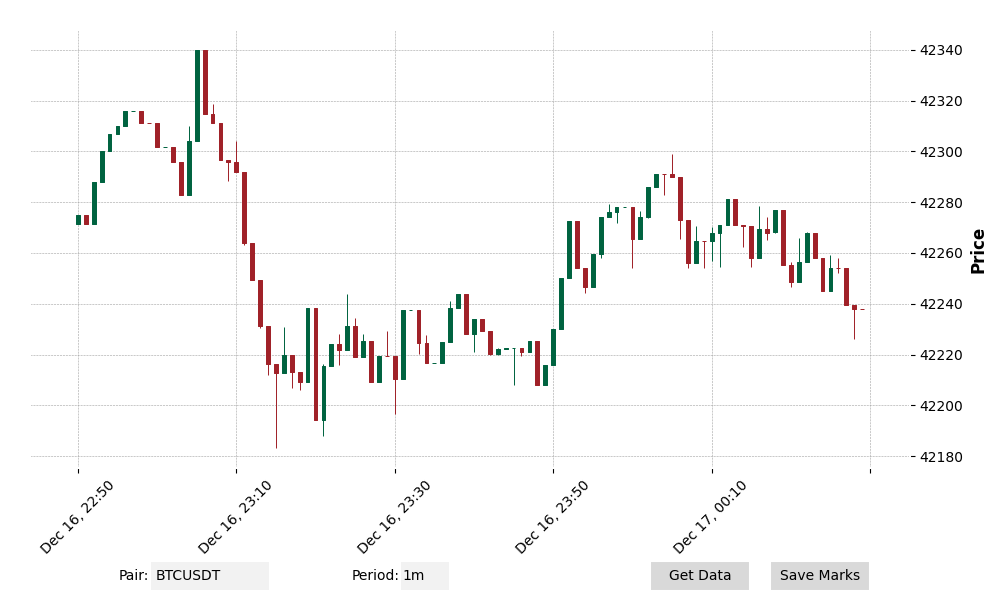

In [6]:
# plotter = CaptureOnClick(pair_df=pair_df, data_proc=dp)
plotter = CaptureOnClick(data_proc=dp)

## Utils. 
* Store selections

In [7]:
# Save points to file
# plotter.save_m_to_file()

print(f'Default pair: {plotter.pair} default period: {plotter.interval}')
   

Default pair: BTCUSDT default period: 1m


## debug print from chart, on mouse click 

In [8]:
print(plotter.captured_output)

Data coords: (74.99745, 42291.115547945206) date clicked: 2023-12-17 00:05:00  figure coords: (672, 426)Figure clicked at: (801,16) | Saved marks data in: .\.data\mBTCUSDT-1m-2023-12-17.csv | 


In [9]:
del plotter

In [9]:
df = datamap
df = df.loc[:, df.notna().any()]
print(df)

                                               BTCUSDT  \
1m   {'StartDate': 2023-12-16 22:50:00, 'EndDate': ...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': None, 'EndDate': None, 'Updated'...   
30m  {'StartDate': None, 'EndDate': None, 'Updated'...   
1h   {'StartDate': 2023-12-12 21:00:00, 'EndDate': ...   
2h   {'StartDate': None, 'EndDate': None, 'Updated'...   
4h   {'StartDate': None, 'EndDate': None, 'Updated'...   
6h   {'StartDate': None, 'EndDate': None, 'Updated'...   
8h   {'StartDate': None, 'EndDate': None, 'Updated'...   
12h  {'StartDate': None, 'EndDate': None, 'Updated'...   
1d   {'StartDate': None, 'EndDate': None, 'Updated'...   
3d   {'StartDate': None, 'EndDate': None, 'Updated'...   
1w   {'StartDate': None, 'EndDate': None, 'Updated'...   
1M   {'StartDate': None, 'EndDate': None, 'Updated'...   

                                               ETHUSDT  
1m   {'StartDa